<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br>Due: June 14, 2020, 23:59</center></h1>

- **Student ID1:** **2015400030**
- **Student ID2:** **2015400084**
- **Student ID3:** **2017400294**

In this project, you are going to implement two unsupervised learning techniques. In the first task, you are asked to implement **k-means clustering** algorithm using the data provided in `kmeans_data.zip`. In the second task, you need to implement **PCA** and apply dimensionality reduction on the data provided in `USPS.mat`. 

# (50 pts) Task 1: K-Means Clustering

Please download `kmeans_data.zip`. In this problem, ground truth cluster assignments are given in `labels.npy`. 

In [2]:
import numpy as np

In [3]:
kmeans_data = np.load('kmeans_data/data.npy')

In [6]:
labels = np.load('kmeans_data/label.npy')

In [4]:
kmeans_data.shape

(500, 2)

In [7]:
labels

array([0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0,

## (10 pts) Task 1.1: Plot Clusters

Plot the data using scatter plot. Assign different colors to different classes.

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plotter(x_feature_data,y_feature_data, label_data, legend_pos, x_label_name, y_label_name, title, col1=0, col2=1):
    plottable=np.column_stack((x_feature_data,y_feature_data))
    plotterStacked(plottable, label_data, legend_pos, x_label_name, y_label_name, title)
    plt.show()

In [17]:
def plotterStacked(plottable, label_data, legend_pos, x_label_name, y_label_name, title, col1=0, col2=1):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(plottable[label_data==0,col1], plottable[label_data== 0,col2], marker = 'x', color='red', label='0')
    ax1.scatter(plottable[label_data==1,col1], plottable[label_data== 1,col2], marker = '+', color='green', label='1')
    ax1.scatter(plottable[label_data==2,col1], plottable[label_data== 2,col2], marker = 'o',facecolors='none', edgecolors='blue', label='2')
    plt.legend(loc= legend_pos)
    #add title, x and y labels
    plt.xlabel(x_label_name) 
    plt.ylabel(y_label_name)
    plt.title(title)

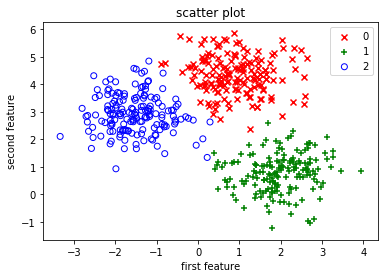

In [19]:
plotter(kmeans_data[:,0],kmeans_data[:,1], labels, \
        'upper right', 'first feature', 'second feature', 'scatter plot')

## (30 pts) Task 1.2: K-Means Implementation

Implement k-means clustering algorithm by yourself using the number of iterations as the stopping condition. You can use built-in functions only for side-tasks such as norm computation, minimum element search and mean calculation, not for the clustering itself.

In [35]:
for i, datum in enumerate(kmeans_data):
    print(datum[0], datum[1], i)

1.065108543439029 4.585179881859681 0
-1.8110632222538436 3.4249402147420978 1
-1.8821663343820552 2.181566189546951 2
1.4243621468148095 3.1719180964308062 3
-0.3791257855460597 4.43593234520407 4
0.9565425187094366 4.6036196368196824 5
0.5257371965634717 2.7474051208912913 6
-1.388326910260428 3.6752369142672086 7
-1.3672666856350584 3.058918224026226 8
1.4993019124897373 3.4715258588057747 9
-2.155084662053187 3.83661151833182 10
-1.5373044055701972 3.4928664172504904 11
-2.128184685132945 2.2886227518072477 12
-0.7699407891011726 2.4759190694185507 13
0.05513489118843029 3.980678104078094 14
0.8935552469564962 3.8276625846505947 15
2.7153997825586402 -1.0201103570947525 16
2.490535243042978 5.2393568920538645 17
-1.1782673299439057 2.8995476951921475 18
0.9331315970795419 4.228673634044568 19
2.292500409084039 2.312394152977295 20
1.3343128231165944 0.6527033047255635 21
1.995115984552749 1.033668716569977 22
-2.0789724913784617 3.6841291236315867 23
1.2397679503554357 3.5342067740

In [33]:
for i in range(3):
    print(kmeans_data[np.random.choice(kmeans_data.shape[0], 1, replace=False)][0])

[-1.89964696  3.36942095]
[-2.19014603  3.08899268]
[2.49053524 5.23935689]


In [27]:
for datum in 

array([108, 388])

In [40]:
def euclidian_dist(point1, point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

In [39]:
euclidian([1,1], [5,4])

5.0

In [48]:
a = np.array(3)

In [64]:
np.zeros(shape=(3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [56]:
kmeans_data[np.random.choice(kmeans_data.shape[0], 1, replace=False)][0]

array([0.34944349, 4.57461908])

In [88]:
def KMeans(k, kmeans_data, iterations):
    
    clusters = np.zeros(shape=(k,2))
    
    
    for i in range(k):
        clusters[i] = kmeans_data[np.random.choice(kmeans_data.shape[0], 1, replace=False)][0]
        
    
    
    new_labels = np.zeros(500)
    
    for iteration in range(iterations):
    
        for i, datum in enumerate(kmeans_data):
            min_value = float('inf')
            for c, cluster in enumerate(clusters):
                cluster_dist = euclidian_dist(cluster, datum)
                if min_value > cluster_dist:
                    new_labels[i] = c
                    min_value = cluster_dist
        
        for i in range(k):
            clusters[i] = [np.mean(kmeans_data[new_labels == i,0]), np.mean(kmeans_data[new_labels == i,1])]
    
    return new_labels

In [99]:
new_labels = KMeans(3, kmeans_data, 9)

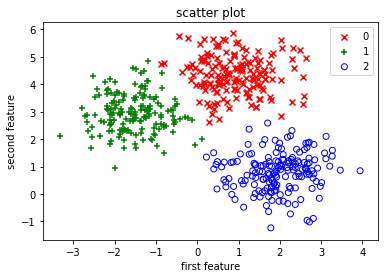

In [100]:
plotter(kmeans_data[:,0],kmeans_data[:,1], new_labels, \
        'upper right', 'first feature', 'second feature', 'scatter plot')

## (10 pts) Taks 1.3: Evaluation

Run k-means $9$ times with number of iterations $(N)$ $= \{1, 2, ..., 9\}$. Plot the final clustering assignments as a scatter plot for each run as 3x3 `matplotlib subplot`. Visually investigate the effect of the number of iterations on obtaining the optimal clustering and find the convergence point by comparing the plots with the one in Task 1.1. If the model does not converge at $9$ iterations, you can select $9$ other $N$ to effectively show the progress of the clustering.

For a fair comparison, start each run with the same initial random assignments. You can use `np.random.seed(1)` to this purpose.

# (50 pts) Task 2: Principal Component Analysis (PCA)

Please load the whole dataset in `USPS.mat` using the function `loadmat` in `Scipy.io`. The matrix $A$ contains all the images of size 16 by 16. Each of the 3000 rows in $A$ corresponds to the image of one handwritten digit (between 0 and 9).

## (30 pts) Task 2.1: PCA Implementation

Implement PCA and apply it to the data using $d = 50, 100, 200, 300$ principal components. You are not allowed to use an existing implementation. You can use existing packages for eigen-decomposition. **Do not forget to standardize the data before eigen-decomposition.**

## (15 pts) Task 2.2: Image Reconstruction

Reconstruct images using the selected principal components from Task 2.1

## (5 pts) Task 2.3: Evaluation

Visualize the reconstructed images for the images at indices $i = 0, 500, 1000, 2000$ for $d=50, 100, 200, 300$. Create a 4x5 subplot where the rows correspond to images at each index, first four columns correspond to reconstructed images using each $d$ and the last column is the raw image, i.e. before PCA. Comment on your results.